<a href="https://colab.research.google.com/github/mashahedi/CRM-COURSEWORK-2/blob/main/CRM_Amazon_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ticker = 'AMZN'
ticker = yfin.Ticker(ticker)

# Importing our data
data = ticker.history(period='5y')

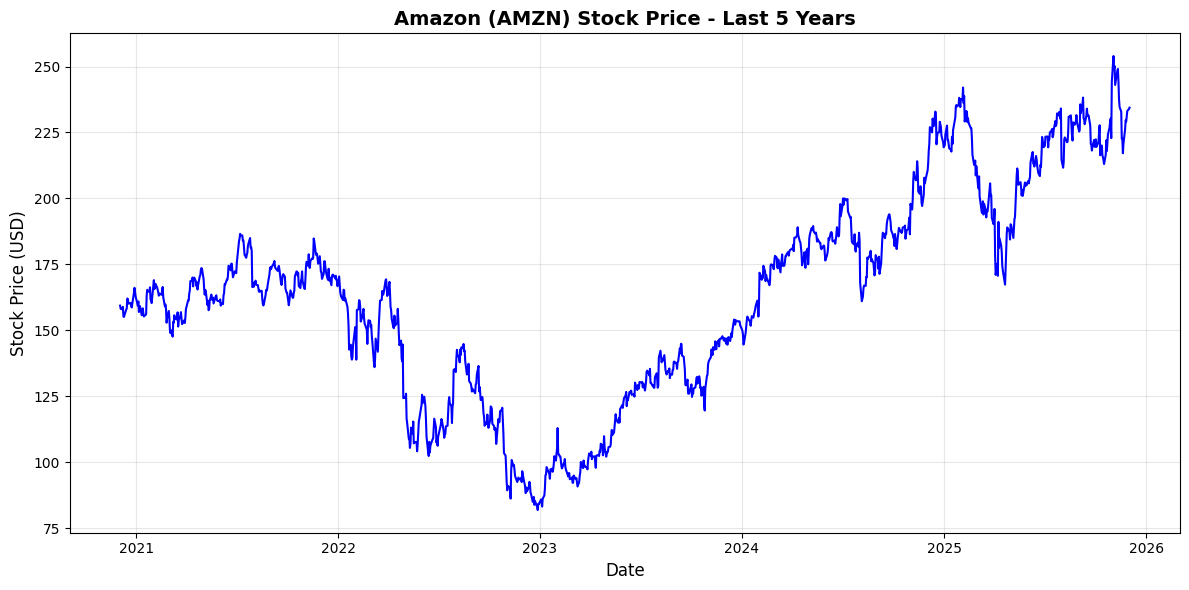

Chart Analysis:
- The line chart shows Amazon stock price trends over the past 5 years
- Price movements reflect market volatility and company performance
- Overall trend indicates long-term price direction


In [ ]:
# Task A(a): Data Visualization - Line chart for Amazon stock price (last 5 years)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], linewidth=1.5, color='blue')
plt.title('Amazon (AMZN) Stock Price - Last 5 Years', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Comment on line chart behavior
print("Chart Analysis:")
print("- The line chart shows Amazon stock price trends over the past 5 years")
print("- Price movements reflect market volatility and company performance")
print("- Overall trend indicates long-term price direction")


In [ ]:
# Display first few rows
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-03 00:00:00-05:00,160.272995,161.432007,159.065506,159.336502,57840000,0.0,0.0
2020-12-04 00:00:00-05:00,159.910507,159.910507,157.938004,158.128998,58272000,0.0,0.0
2020-12-07 00:00:00-05:00,157.824005,159.037994,157.084503,157.899994,55026000,0.0,0.0
2020-12-08 00:00:00-05:00,157.945007,159.206497,156.001007,158.864502,65726000,0.0,0.0
2020-12-09 00:00:00-05:00,158.394501,158.721497,154.399994,155.210007,82016000,0.0,0.0


In [ ]:
# Task A(b): Build explanatory variables - Technical indicators

# SMA_20: Simple Moving Average for 20 days
data['SMA_20'] = data['Close'].shift(1).rolling(window=20).mean()

# SMA_50: Simple Moving Average for 50 days
data['SMA_50'] = data['Close'].shift(1).rolling(window=50).mean()

# EMA_20: Exponential Moving Average for 20 days
data['EMA_20'] = data['Close'].shift(1).ewm(span=20, adjust=False).mean()

# RSI: Relative Strength Index with 14-day window
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Display data with technical indicators
data[['Close', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI']].head(10)

,Close,SMA_20,SMA_50,EMA_20,RSI
Date,,,,,
2020-12-03 00:00:00-05:00,159.336502,NaN,NaN,NaN,NaN
2020-12-04 00:00:00-05:00,158.128998,NaN,NaN,159.336502,NaN
2020-12-07 00:00:00-05:00,157.899994,NaN,NaN,159.221502,NaN
2020-12-08 00:00:00-05:00,158.864502,NaN,NaN,159.095644,NaN
2020-12-09 00:00:00-05:00,155.210007,NaN,NaN,159.073630,NaN
2020-12-10 00:00:00-05:00,155.074493,NaN,NaN,158.705666,NaN
2020-12-11 00:00:00-05:00,155.820999,NaN,NaN,158.359840,NaN
2020-12-14 00:00:00-05:00,157.848495,NaN,NaN,158.118046,NaN
2020-12-15 00:00:00-05:00,158.255997,NaN,NaN,158.092374,NaN


In [ ]:
# Dropping the NaN values
data = data.dropna()

# Initializing X with features for Linear Regression (MA20 and MA50)
X = data[['SMA_20', 'SMA_50']]

# Display first few rows
X.head()

,SMA_20,SMA_50
Date,,
2021-02-17 00:00:00-05:00,164.304399,161.16968
2021-02-18 00:00:00-05:00,164.774100,161.29159
2021-02-19 00:00:00-05:00,164.936224,161.45724
2021-02-22 00:00:00-05:00,164.793499,161.54914
2021-02-23 00:00:00-05:00,164.514774,161.55259


In [ ]:
# Setting-up the dependent variable
y = data['Close']

# Getting the head of the data
y.head()

,Close
Date,
2021-02-17 00:00:00-05:00,165.432007
2021-02-18 00:00:00-05:00,166.411499
2021-02-19 00:00:00-05:00,162.494995
2021-02-22 00:00:00-05:00,159.037003
2021-02-23 00:00:00-05:00,159.725006


In [ ]:
# Task A(c): Define Train and Test Data

# Set reproducible seed for consistency
np.random.seed(42)

# Setting the training set to 70% of the data
training = 0.7
t = int(training * len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 843 samples
Testing set size: 362 samples


In [ ]:
# Task A(d): Build Linear Regression Model using MA20 and MA50 as inputs
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression Model trained successfully")

Linear Regression Model trained successfully


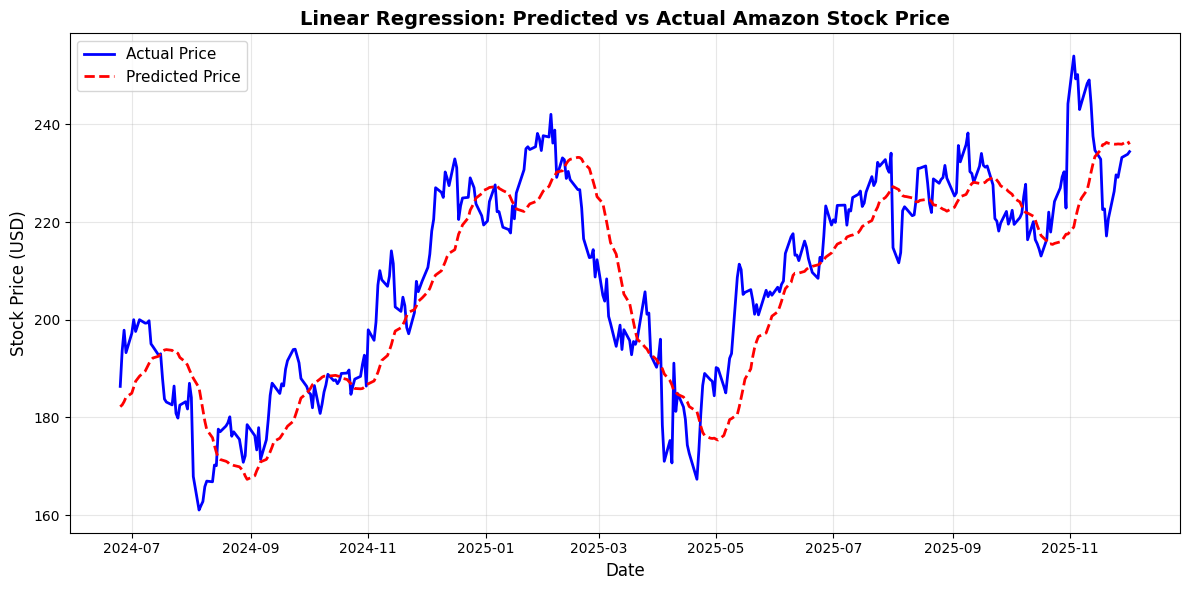

Linear Regression Model Accuracy (R² Score): 76.40%


In [ ]:
# Task A(e): Prediction Function and Result
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])

# Visualize predicted vs actual stock values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Price', linewidth=2, color='blue')
plt.plot(predicted_price.index, predicted_price.values, label='Predicted Price', linewidth=2, color='red', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual Amazon Stock Price', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate model accuracy
accuracy = model.score(X_test, y_test) * 100
print(f"Linear Regression Model Accuracy (R² Score): {accuracy:.2f}%")

In [ ]:
# Additional performance metrics for Linear Regression
lr_mse = mean_squared_error(y_test, predicted_price)
lr_mae = mean_absolute_error(y_test, predicted_price)
lr_r2 = r2_score(y_test, predicted_price)

print(f"Linear Regression Performance Metrics:")
print(f"  Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"  Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"  R² Score: {lr_r2:.4f}")

Linear Regression Performance Metrics:
  Mean Squared Error (MSE): 100.40
  Mean Absolute Error (MAE): 8.07
  R² Score: 0.7640


In [ ]:
# Task A(f): Calculate alpha and betas values
alpha = model.intercept_
beta_ma20 = model.coef_[0]
beta_ma50 = model.coef_[1]

print(f"Alpha (intercept): {alpha:.6f}")
print(f"Beta for SMA_20: {beta_ma20:.6f}")
print(f"Beta for SMA_50: {beta_ma50:.6f}")

# Define the linear regression equation
print(f"\nLinear Regression Equation:")
print(f"Amazon_Price = {beta_ma20:.6f} * SMA_20 + {beta_ma50:.6f} * SMA_50 + {alpha:.6f}")

Alpha (intercept): 4.634949
Beta for SMA_20: 1.273200
Beta for SMA_50: -0.304871

Linear Regression Equation:
Amazon_Price = 1.273200 * SMA_20 + -0.304871 * SMA_50 + 4.634949


Random Forest Training set size: 843 samples
Random Forest Testing set size: 362 samples
Random Forest Regressor trained successfully


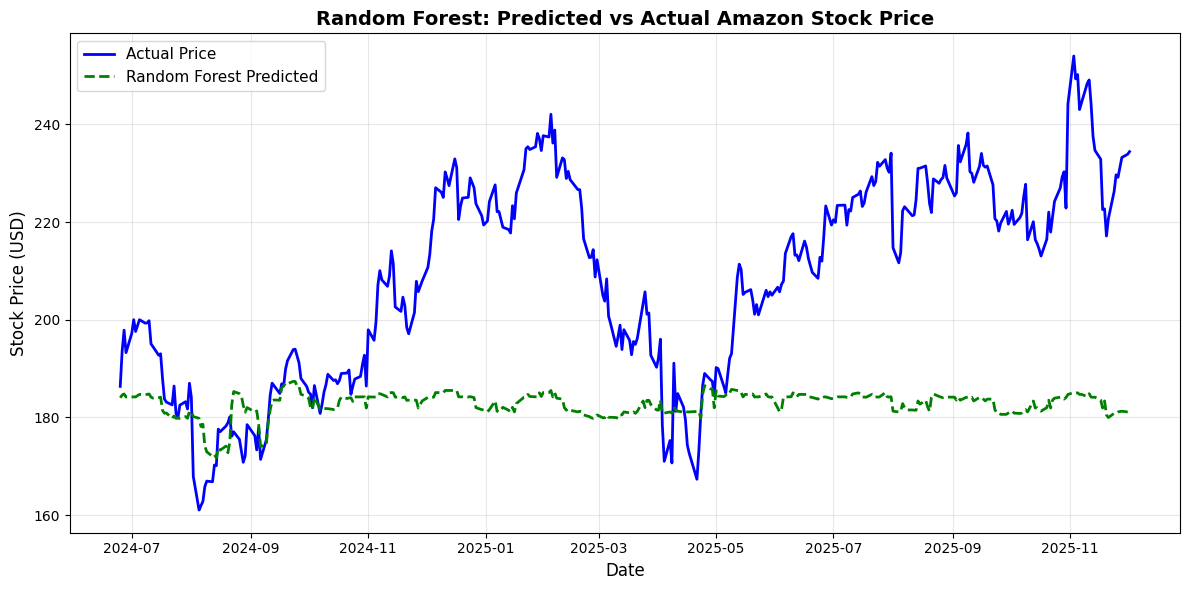


Random Forest Performance Metrics:
  R² Score: -1.4443 (-144.43%)
  Mean Squared Error (MSE): 1039.71
  Mean Absolute Error (MAE): 26.76

MODEL COMPARISON: Random Forest vs Linear Regression
Linear Regression R² Score:    0.7640 (76.40%)
Random Forest R² Score:       -1.4443 (-144.43%)

Linear Regression MSE:       100.40
Random Forest MSE:            1039.71

Linear Regression MAE:        8.07
Random Forest MAE:            26.76

✓ Linear Regression performs better (higher R² score)
✓ Linear Regression has lower error (MSE)


In [ ]:
# Task A(g): Build and evaluate Random Forest Regressor
# Using MA20, EMA20, MA50, and RSI as inputs

# Prepare features for Random Forest (includes all indicators)
X_rf = data[['SMA_20', 'EMA_20', 'SMA_50', 'RSI']].dropna()
y_rf = data.loc[X_rf.index, 'Close']

# Split data for Random Forest (using same seed for consistency)
np.random.seed(42)
t_rf = int(0.7 * len(X_rf))
X_rf_train = X_rf[:t_rf]
y_rf_train = y_rf[:t_rf]
X_rf_test = X_rf[t_rf:]
y_rf_test = y_rf[t_rf:]

print(f"Random Forest Training set size: {len(X_rf_train)} samples")
print(f"Random Forest Testing set size: {len(X_rf_test)} samples")

# Build Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_rf_train, y_rf_train)
print("Random Forest Regressor trained successfully")

# Make predictions
rf_predicted = rf_model.predict(X_rf_test)
rf_predicted_df = pd.DataFrame(rf_predicted, index=X_rf_test.index, columns=['price'])

# Visualize Random Forest predictions
plt.figure(figsize=(12, 6))
plt.plot(y_rf_test.index, y_rf_test.values, label='Actual Price', linewidth=2, color='blue')
plt.plot(rf_predicted_df.index, rf_predicted_df.values, label='Random Forest Predicted', linewidth=2, color='green', linestyle='--')
plt.title('Random Forest: Predicted vs Actual Amazon Stock Price', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate Random Forest performance metrics
rf_r2 = r2_score(y_rf_test, rf_predicted)
rf_mse = mean_squared_error(y_rf_test, rf_predicted)
rf_mae = mean_absolute_error(y_rf_test, rf_predicted)

print(f"\nRandom Forest Performance Metrics:")
print(f"  R² Score: {rf_r2:.4f} ({rf_r2*100:.2f}%)")
print(f"  Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"  Mean Absolute Error (MAE): {rf_mae:.2f}")

# Compare Random Forest with Linear Regression
print(f"\n{'='*60}")
print("MODEL COMPARISON: Random Forest vs Linear Regression")
print(f"{'='*60}")
print(f"Linear Regression R² Score:    {lr_r2:.4f} ({lr_r2*100:.2f}%)")
print(f"Random Forest R² Score:       {rf_r2:.4f} ({rf_r2*100:.2f}%)")
print(f"\nLinear Regression MSE:       {lr_mse:.2f}")
print(f"Random Forest MSE:            {rf_mse:.2f}")
print(f"\nLinear Regression MAE:        {lr_mae:.2f}")
print(f"Random Forest MAE:            {rf_mae:.2f}")

# Determine which model performs better
if rf_r2 > lr_r2:
    print(f"\n✓ Random Forest performs better (higher R² score)")
else:
    print(f"\n✓ Linear Regression performs better (higher R² score)")

if rf_mse < lr_mse:
    print(f"✓ Random Forest has lower error (MSE)")
else:
    print(f"✓ Linear Regression has lower error (MSE)")